In [39]:
import matplotlib.colors as clr
import matplotlib.pyplot as plt
import f21_predict_base as base
import importlib
import logging
import numpy as np
importlib.reload(base)

filepath = "../data/denoised_2560_400sampUnet20ep/f21_unet_ps_dum_train_test_uGMRT_t500.0_20250402163305/denoised_ps"
#"output/f21_ps_dump_denoised_train_test_uGMRT_t500_20250326160024/ps" #F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.40_xHI0.64_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv
colorlabels=[r'$\langle x_{HI}\rangle$', r'$log_{10}(f_X)$']
colormaps=[plt.cm.viridis_r, plt.cm.viridis_r]
def plot_power_spectra(ps, psstd, ks, params, psn=None, colorind=1, output_dir=".", showplots=False, saveplots=True, label="", scale='log', markers=False):
    #logger.info(f'shapes ps:{ps.shape} ks:{ks.shape}')
    base.initplt()
    fig, ax = plt.subplots(nrows=1, ncols=1) 

    # plot the noise
    if psn is not None: 
        #for i in range(psn.shape[0]):
        #    ax.scatter(ks[0,1:]*1e6, psn[i, 1:], c='red',alpha=0.1)
        # Calculate mean and standard deviation of psn
        psn_mean = np.mean(psn[:,1:], axis=0)
        psn_std = np.std(psn[:,1:], axis=0)

        # Plot the mean as a dotted red line
        ax.plot(ks[0,1:]*1e6, psn_mean, color='red', linestyle='--', alpha=1, label='Noise')

        # Add the shaded region for 1 standard deviation
        ax.fill_between(ks * 1e6, psn_mean - psn_std, psn_mean + psn_std, color='red', alpha=0.3, label='Noise 1 Std Dev')
        ax.fill_between(ks * 1e6, psn_mean - 2*psn_std, psn_mean + 2*psn_std, color='red', alpha=0.1, label='Noise 2 Std Dev')

    alpha = base.decide_alpha(len(ps))
    logging.info(params[0:2])
    coloraxs = params[:,colorind]
    mincoloraxs = min(coloraxs)
    maxcoloraxs = max(coloraxs)
    print(f"min-max range: {mincoloraxs}-{maxcoloraxs}")
    if markers: marker='o' 
    else: marker = None

    sm = plt.cm.ScalarMappable(cmap=colormaps[colorind], norm=clr.Normalize(vmin=mincoloraxs, vmax=maxcoloraxs))
    cbar = plt.colorbar(sm, ax=ax, label=colorlabels[colorind])

    plt.title(label)    
    if scale == 'log': 
        ax.set_xscale('log')
        ax.set_yscale('log')

    for i, (row_ps, row_psstd, row_coloraxs) in enumerate(zip(ps, psstd, coloraxs)):
        color=sm.to_rgba(row_coloraxs)
        #if i%1000==0: print(f"color mapping: {row_coloraxs} : {color}")
        ax.plot(ks*1e6, row_ps, linewidth=0.5, color=color, alpha=alpha, marker= marker)
        ax.fill_between(ks * 1e6, row_ps - row_psstd, row_ps + row_psstd, color=color, alpha=0.3)
        #ax.set_yscale('log')
        #if i> 10: break
        # Plot noise curve

    #plt.legend()
    plt.xlabel(r"k (Hz$^{-1}$)")
    plt.ylabel("$kP_{21}$")
    #plt.ylim((1e-22, 1e-2))
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    
    if saveplots: plt.savefig(f"{output_dir}/power_spectra.pdf", format = "pdf")
    if showplots: plt.show()
    plt.close()


ks shape: (1000, 16), ps10 shape: (21, 16)
min-max range: 0.0-1.0


<Figure size 1200x600 with 0 Axes>

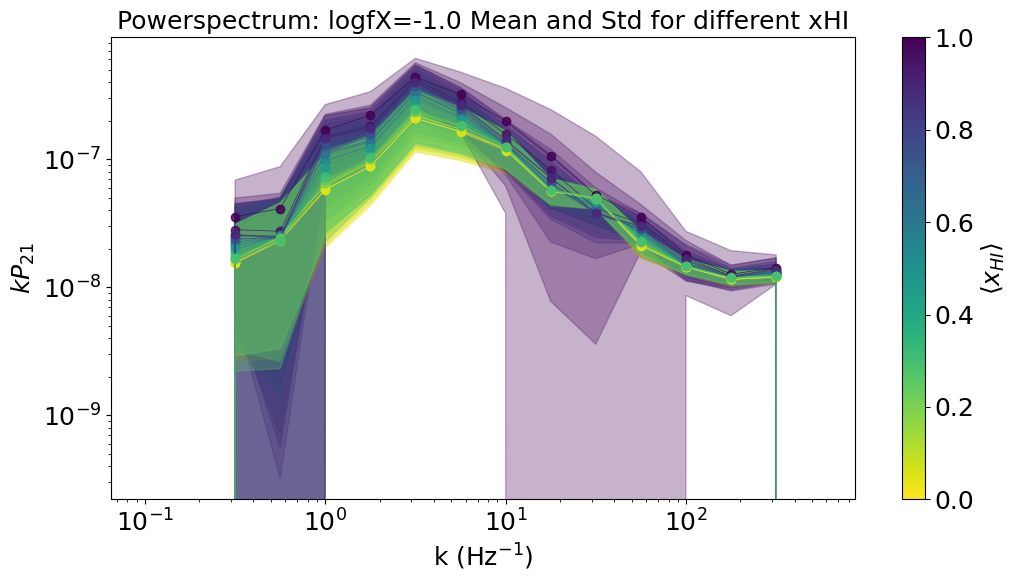

In [40]:
import glob
import numpy as np


files10 = glob.glob(f"{filepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI*_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")
ps10 = np.zeros((len(files10), 16))
ps10std = np.zeros((len(files10), 16))
params = np.zeros((len(files10), 2))
for i, file in enumerate(files10):
    currxHI = float(file.split('xHI')[1].split('_')[0])
    params[i][0] = currxHI
    params[i][1] = -1.0
    currps = np.loadtxt(file)
    #print(f"shape of currps={currps.shape}")
    currps_mean = np.mean(currps, axis=0)
    currps_std = np.std(currps, axis=0)
    ps10[i, :] = currps_mean
    ps10std[i, :] = currps_std

ks = np.loadtxt(f"{filepath}/ks_bin.csv")
print(f"ks shape: {ks.shape}, ps10 shape: {ps10.shape}")
plot_power_spectra(ps10[:,:16], ps10std[:,:16], ks[0,:16], params, colorind=0, showplots=True, saveplots=True, label="Powerspectrum: logfX=-1.0 Mean and Std for different xHI", markers=True)
#plot_power_spectra(ps10[:,16:24], ps10std[:,16:24], ks[16:24], params, colorind=0, showplots=True, saveplots=False, label="Bispectrum: logfX=-1.0 Mean and Std for different xHI", markers=True)


min-max range: 0.0-1.0


<Figure size 1200x600 with 0 Axes>

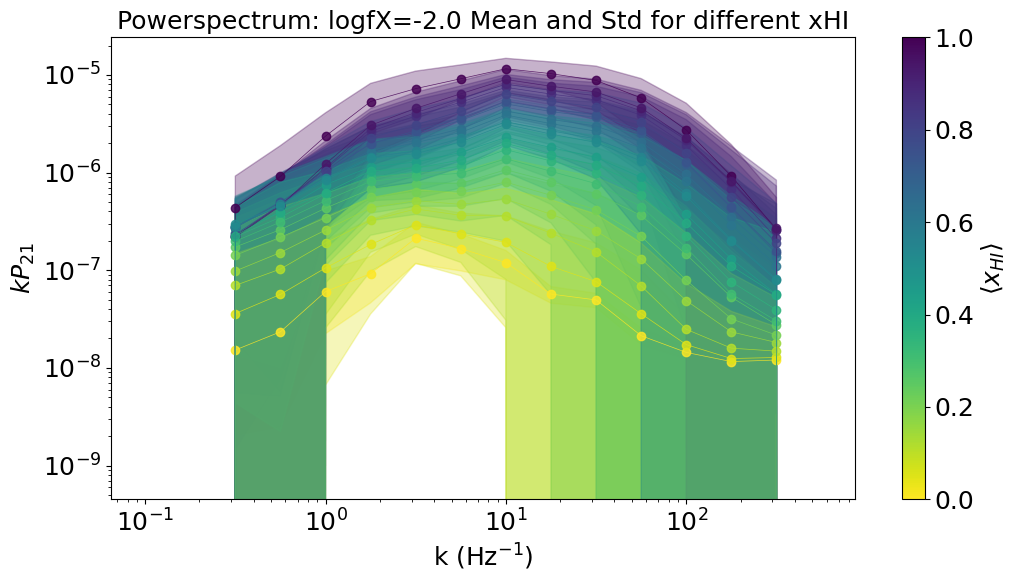

In [4]:
import glob
import numpy as np


files20 = glob.glob(f"{filepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI*_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")
ps20 = np.zeros((len(files20), 16))
ps20std = np.zeros((len(files20), 16))
params = np.zeros((len(files20), 2))
for i, file in enumerate(files20):
    currxHI = float(file.split('xHI')[1].split('_')[0])
    params[i][0] = currxHI
    params[i][1] = -1.0
    currps = np.loadtxt(file)
    #print(f"shape of currps={currps.shape}")
    currps_mean = np.mean(currps, axis=0)
    currps_std = np.std(currps, axis=0)
    ps20[i, :] = currps_mean
    ps20std[i, :] = currps_std

ks = np.loadtxt(f"{filepath}/ks_bin.csv")
plot_power_spectra(ps20[:,:16], ps20std[:,:16], ks[0,:16], params, colorind=0, showplots=True, saveplots=False, label="Powerspectrum: logfX=-2.0 Mean and Std for different xHI", markers=True)
#plot_power_spectra(ps20[:,16:24], ps20std[:,16:24], ks[16:24], params, colorind=0, showplots=True, saveplots=False, label="Bispectrum: logfX=-2.0 Mean and Std for different xHI", markers=True)


ks shape: (1000, 16)
ps2052noisy shape: (1000, 16)
shape of ps=(1000, 16)
shape of ps=(1000, 16)
shape of ps=(1000, 16)


<Figure size 1200x600 with 0 Axes>

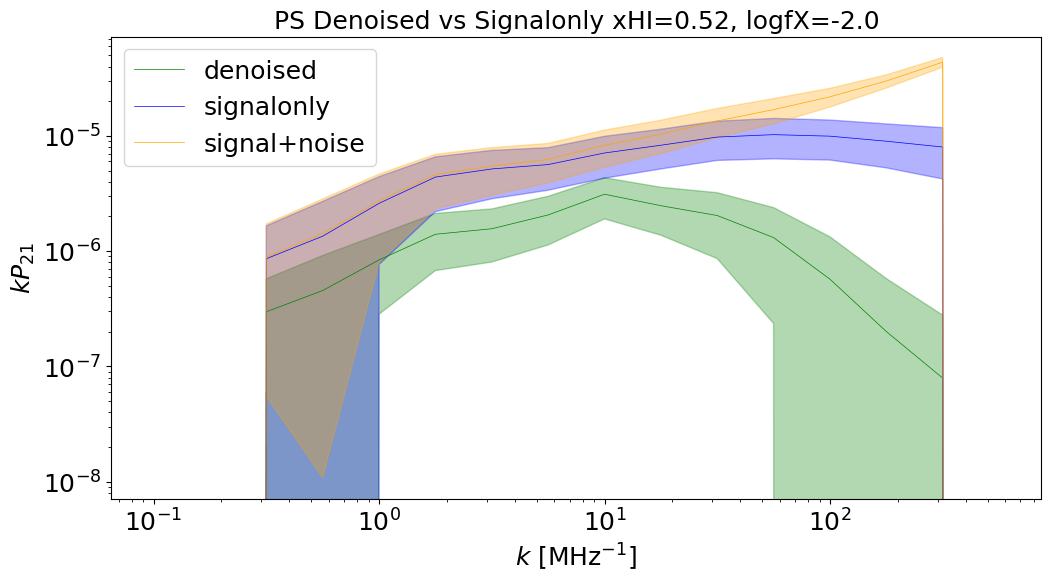

In [5]:
import glob
import numpy as np

ks = np.loadtxt(f"{filepath}/ks_bin.csv")
print(f"ks shape: {ks.shape}")
ps2052 = np.loadtxt(f"{filepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.52_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")
ps2052so = np.loadtxt(f"saved_output/train_test_psbs_dump/signalonly/f21_ps_dum_train_test_uGMRT_t500.0_20250331123002/test_ps/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.52_8kHz.csv")[:,:16]
#ps2052noisy = np.loadtxt(f"saved_output/train_test_psbs_dump/noisy/test_ps/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.52_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")[:,:16]
#"saved_output/train_test_psbs_dump/noisy_mean/f21_ps_dum_train_test_uGMRT_t500.0_20250401163449/ps"
#ps2052noisy = np.loadtxt(f"output/f21_ps_dum_train_test_uGMRT_t500_20250326171749/test_ps/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.52_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")[:,:16]
#ps2052noisy = ps2052noisy*ks[0]*1e6
ps2052noisy = np.loadtxt(f"output/f21_ps_dum_train_test_uGMRT_t500_20250403221514/test_ps/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.52_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")[:,:16]
print(f"ps2052noisy shape: {ps2052noisy.shape}")

base.initplt()
fig, ax = plt.subplots(nrows=1, ncols=1) 

plt.title('PS Denoised vs Signalonly xHI=0.52, logfX=-2.0')    
ax.set_xscale('log')
ax.set_yscale('log')

for i, (currps, c, label) in enumerate(zip([ps2052, ps2052so, ps2052noisy],['green', 'blue', 'orange'],['denoised','signalonly', 'signal+noise'])):
    print(f"shape of ps={currps.shape}")
    ps_mean = np.mean(currps, axis=0)
    currps_std = np.std(currps, axis=0)
    ax.plot(ks[0]*1e6, ps_mean, linewidth=0.5, color=c, label=label)
    ax.fill_between(ks[0] * 1e6, ps_mean - currps_std, ps_mean + currps_std, color=c, alpha=0.3)

plt.xlabel(r"$k$ [MHz$^{-1}$]")
plt.ylabel("$kP_{21}$")
#plt.ylim((1e-22, 1e-2))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend()
plt.show()


ks shape: (1000, 16)
ps2052noisy shape: (1000, 16)
shape of ps=(1000, 16)
shape of ps=(100, 16)
shape of ps=(1000, 16)


<Figure size 1200x600 with 0 Axes>

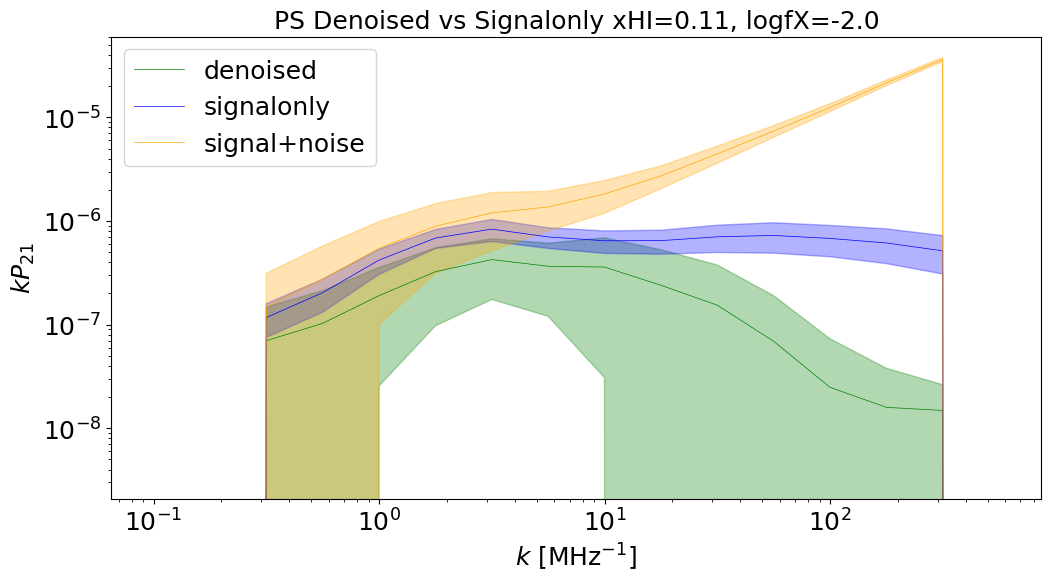

In [6]:
import glob
import numpy as np

ks = np.loadtxt(f"{filepath}/ks_bin.csv")
print(f"ks shape: {ks.shape}")
ps2052 = np.loadtxt(f"{filepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.11_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")
ps2052so = np.loadtxt(f"saved_output/train_test_psbs_dump/signalonly/f21_ps_dum_train_test_uGMRT_t500.0_20250331123002/ps/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.11_8kHz.csv")[:,:16]
#ps2052noisy = np.loadtxt(f"saved_output/train_test_psbs_dump/noisy/test_ps/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.52_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")[:,:16]
#"saved_output/train_test_psbs_dump/noisy_mean/f21_ps_dum_train_test_uGMRT_t500.0_20250401163449/ps"
#ps2052noisy = np.loadtxt(f"output/f21_ps_dum_train_test_uGMRT_t500_20250326171749/test_ps/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.52_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")[:,:16]
#ps2052noisy = ps2052noisy*ks[0]*1e6
ps2052noisy = np.loadtxt(f"output/f21_ps_dum_train_test_uGMRT_t500_20250403221514/ps/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.11_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")[:,:16]
print(f"ps2052noisy shape: {ps2052noisy.shape}")

base.initplt()
fig, ax = plt.subplots(nrows=1, ncols=1) 

plt.title('PS Denoised vs Signalonly xHI=0.11, logfX=-2.0')    
ax.set_xscale('log')
ax.set_yscale('log')

for i, (currps, c, label) in enumerate(zip([ps2052, ps2052so, ps2052noisy],['green', 'blue', 'orange'],['denoised','signalonly', 'signal+noise'])):
    print(f"shape of ps={currps.shape}")
    ps_mean = np.mean(currps, axis=0)
    currps_std = np.std(currps, axis=0)
    ax.plot(ks[0]*1e6, ps_mean, linewidth=0.5, color=c, label=label)
    ax.fill_between(ks[0] * 1e6, ps_mean - currps_std, ps_mean + currps_std, color=c, alpha=0.3)

plt.xlabel(r"$k$ [MHz$^{-1}$]")
plt.ylabel("$kP_{21}$")
#plt.ylim((1e-22, 1e-2))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend()
plt.show()


shape of ps=(1000, 16)
shape of ps=(100, 16)
shape of ps=(1000, 16)


<Figure size 1200x600 with 0 Axes>

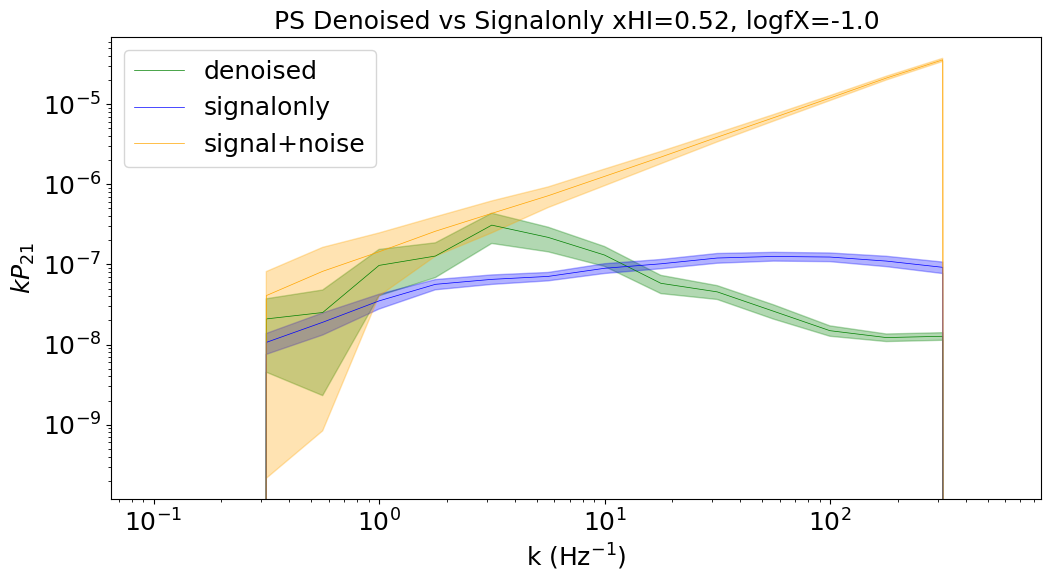

In [7]:
import glob
import numpy as np

ks = np.loadtxt(f"{filepath}/ks_bin.csv")
ps1052 = np.loadtxt(f"{filepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.52_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")
ps1052so = np.loadtxt(f"saved_output/train_test_psbs_dump/signalonly/f21_ps_dum_train_test_uGMRT_t500.0_20250331123002/ps/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.52_8kHz.csv")[:,:16]
#ps1052noisy = np.loadtxt(f"saved_output/train_test_psbs_dump/noisy/ps/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.52_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")[:,:16]
#ps1052noisy *= ks[0]*1e6
ps1052noisy = np.loadtxt(f"output/f21_ps_dum_train_test_uGMRT_t500_20250403221514/ps/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.52_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")[:,:16]

base.initplt()
fig, ax = plt.subplots(nrows=1, ncols=1) 

plt.title('PS Denoised vs Signalonly xHI=0.52, logfX=-1.0')    
ax.set_xscale('log')
ax.set_yscale('log')

for i, (currps, c, label) in enumerate(zip([ps1052, ps1052so, ps1052noisy],['green', 'blue', 'orange'],['denoised','signalonly', 'signal+noise'])):
    print(f"shape of ps={currps.shape}")
    ps_mean = np.mean(currps, axis=0)
    currps_std = np.std(currps, axis=0)
    ax.plot(ks[0]*1e6, ps_mean, linewidth=0.5, color=c, label=label)
    ax.fill_between(ks[0] * 1e6, ps_mean - currps_std, ps_mean + currps_std, color=c, alpha=0.3)

plt.xlabel(r"k (Hz$^{-1}$)")
plt.ylabel("$kP_{21}$")
#plt.ylim((1e-22, 1e-2))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend()
plt.show()


shape of ps=(1000, 16)
shape of ps=(1000, 16)
shape of ps=(1000, 16)


<Figure size 1200x600 with 0 Axes>

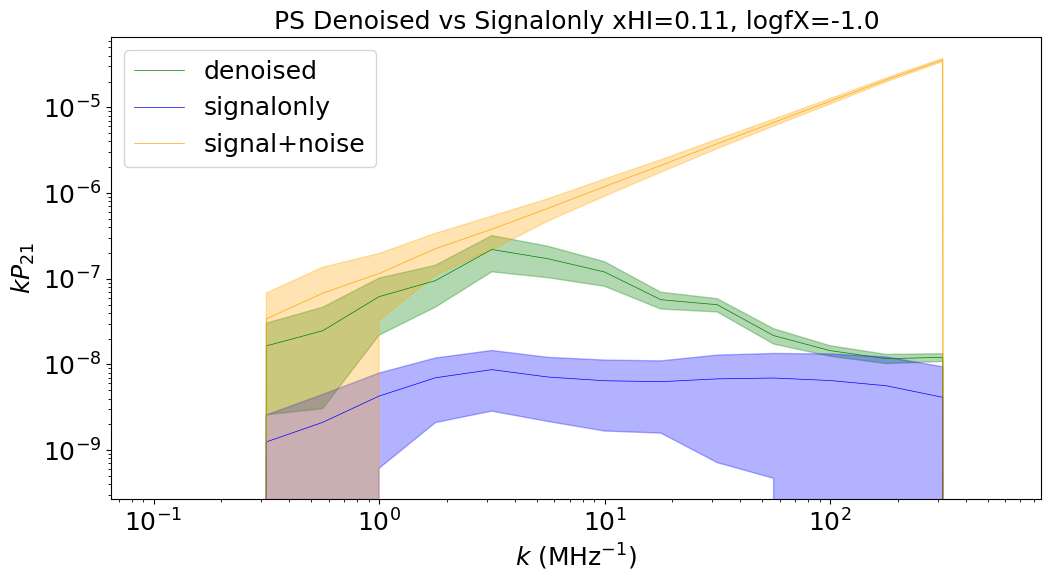

In [8]:
import glob
import numpy as np

ks = np.loadtxt(f"{filepath}/ks_bin.csv")
ps1052 = np.loadtxt(f"{filepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.11_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")
ps1052so = np.loadtxt(f"saved_output/train_test_psbs_dump/signalonly/f21_ps_dum_train_test_uGMRT_t500.0_20250331123002/test_ps/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.11_8kHz.csv")[:,:16]
#ps1052noisy = np.loadtxt(f"saved_output/train_test_psbs_dump/noisy/ps/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.52_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")[:,:16]
#ps1052noisy *= ks[0]*1e6
ps1052noisy = np.loadtxt(f"output/f21_ps_dum_train_test_uGMRT_t500_20250403221514/test_ps/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.11_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")[:,:16]

base.initplt()
fig, ax = plt.subplots(nrows=1, ncols=1) 

plt.title('PS Denoised vs Signalonly xHI=0.11, logfX=-1.0')    
ax.set_xscale('log')
ax.set_yscale('log')

for i, (currps, c, label) in enumerate(zip([ps1052, ps1052so, ps1052noisy],['green', 'blue', 'orange'],['denoised','signalonly', 'signal+noise'])):
    print(f"shape of ps={currps.shape}")
    ps_mean = np.mean(currps, axis=0)
    currps_std = np.std(currps, axis=0)
    ax.plot(ks[0]*1e6, ps_mean, linewidth=0.5, color=c, label=label)
    ax.fill_between(ks[0] * 1e6, ps_mean - currps_std, ps_mean + currps_std, color=c, alpha=0.3)

plt.xlabel(r"$k$ (MHz$^{-1}$)")
plt.ylabel("$kP_{21}$")
#plt.ylim((1e-22, 1e-2))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend()
plt.show()


shape of ps=(1000, 16)
shape of ps=(100, 16)
shape of ps=(1000, 16)


<Figure size 1200x600 with 0 Axes>

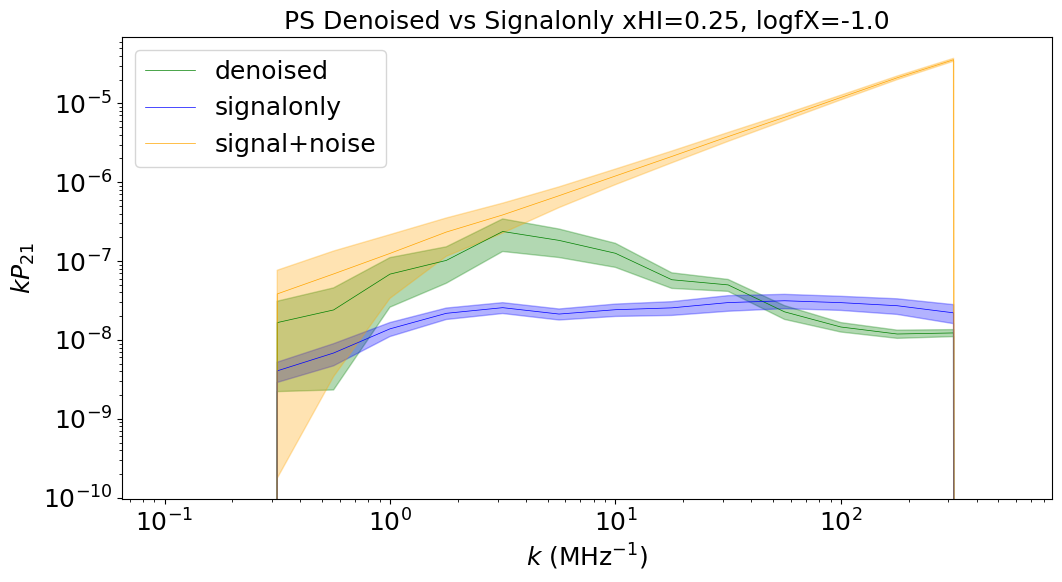

In [9]:
import glob
import numpy as np

ks = np.loadtxt(f"{filepath}/ks_bin.csv")
ps1052 = np.loadtxt(f"{filepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.25_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")
ps1052so = np.loadtxt(f"saved_output/train_test_psbs_dump/signalonly/f21_ps_dum_train_test_uGMRT_t500.0_20250331123002/ps/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.25_8kHz.csv")[:,:16]
#ps1052noisy = np.loadtxt(f"saved_output/train_test_psbs_dump/noisy/ps/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.52_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")[:,:16]
#ps1052noisy *= ks[0]*1e6
ps1052noisy = np.loadtxt(f"output/f21_ps_dum_train_test_uGMRT_t500_20250403221514/ps/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.25_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")[:,:16]

base.initplt()
fig, ax = plt.subplots(nrows=1, ncols=1) 

plt.title('PS Denoised vs Signalonly xHI=0.25, logfX=-1.0')    
ax.set_xscale('log')
ax.set_yscale('log')

for i, (currps, c, label) in enumerate(zip([ps1052, ps1052so, ps1052noisy],['green', 'blue', 'orange'],['denoised','signalonly', 'signal+noise'])):
    print(f"shape of ps={currps.shape}")
    ps_mean = np.mean(currps, axis=0)
    currps_std = np.std(currps, axis=0)
    ax.plot(ks[0]*1e6, ps_mean, linewidth=0.5, color=c, label=label)
    ax.fill_between(ks[0] * 1e6, ps_mean - currps_std, ps_mean + currps_std, color=c, alpha=0.3)

plt.xlabel(r"$k$ (MHz$^{-1}$)")
plt.ylabel("$kP_{21}$")
#plt.ylim((1e-22, 1e-2))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend()
plt.show()


shape of ps=(20, 16)
shape of ps=(100, 16)
shape of ps=(1000, 16)


<Figure size 1200x600 with 0 Axes>

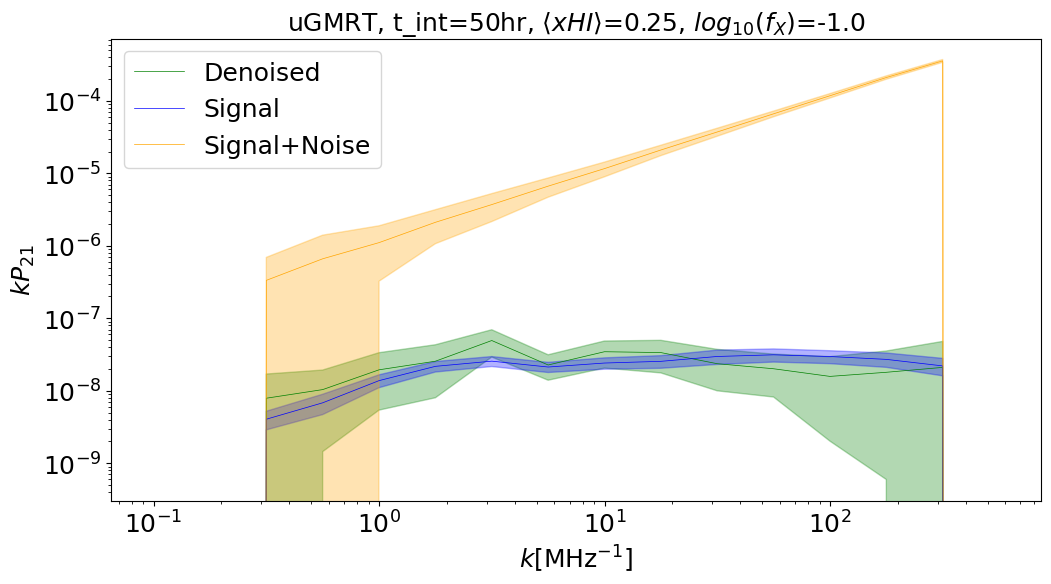

In [33]:
import glob
import numpy as np

g50denoisedfilepath = '../data/denoised_gmrt50h/f21_unet_ps_dum_train_test_uGMRT_t50.0_20250414044023/denoised_ps'

ks = np.loadtxt(f"{g50denoisedfilepath}/ks_bin.csv")
ps1052 = np.loadtxt(f"{g50denoisedfilepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.25_uGMRT_8kHz_t50h_Smin64.2mJy_alphaR-0.44.csv")
ps1052so = np.loadtxt(f"saved_output/train_test_psbs_dump/signalonly/f21_ps_dum_train_test_uGMRT_t500.0_20250331123002/ps/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.25_8kHz.csv")[:,:16]
#ps1052noisy = np.loadtxt(f"saved_output/train_test_psbs_dump/noisy/ps/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.52_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")[:,:16]
#ps1052noisy *= ks[0]*1e6
ps1052noisy = np.loadtxt(f"saved_output/train_test_psbs_dump/noisy_g50/f21_ps_dum_train_test_uGMRT_t50.0_20250410153928/ps/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.25_uGMRT_8kHz_t50h_Smin64.2mJy_alphaR-0.44.csv")[:,:16]


base.initplt()
fig, ax = plt.subplots(nrows=1, ncols=1) 

plt.title(r'uGMRT, t_int=50hr, $\langle xHI\rangle$=0.25, $log_{10}(f_X)$=-1.0')    

ax.set_xscale('log')
ax.set_yscale('log')

for i, (currps, c, label) in enumerate(zip([ps1052, ps1052so, ps1052noisy],['green', 'blue', 'orange'],['Denoised','Signal', 'Signal+Noise'])):
    print(f"shape of ps={currps.shape}")
    ps_mean = np.mean(currps, axis=0)
    currps_std = np.std(currps, axis=0)
    ax.plot(ks[0]*1e6, ps_mean, linewidth=0.5, color=c, label=label)
    ax.fill_between(ks[0] * 1e6, ps_mean - currps_std, ps_mean + currps_std, color=c, alpha=0.3)

plt.xlabel(r"$k$[MHz$^{-1}$]")
plt.ylabel("$kP_{21}$")
#plt.ylim((1e-22, 1e-2))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend()
plt.show()


shape of ps=(20, 16)
shape of ps=(1000, 16)
shape of ps=(1000, 16)


<Figure size 1200x600 with 0 Axes>

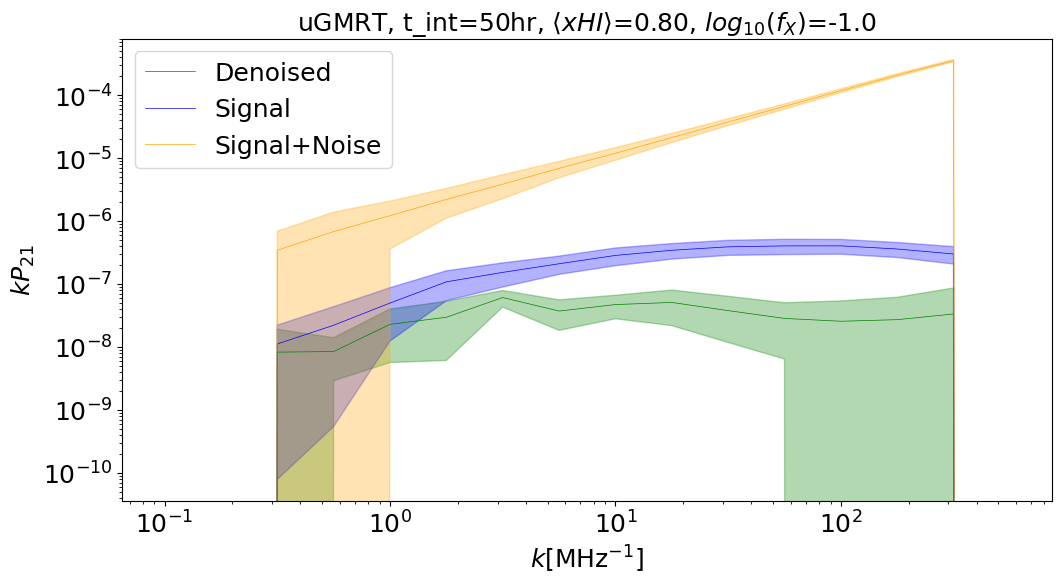

In [35]:
import glob
import numpy as np

g50denoisedfilepath = '../data/denoised_gmrt50h/f21_unet_ps_dum_train_test_uGMRT_t50.0_20250414044023/denoised_ps'

ks = np.loadtxt(f"{g50denoisedfilepath}/ks_bin.csv")
ps1052 = np.loadtxt(f"{g50denoisedfilepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.80_uGMRT_8kHz_t50h_Smin64.2mJy_alphaR-0.44.csv")
ps1052so = np.loadtxt(f"saved_output/train_test_psbs_dump/signalonly/f21_ps_dum_train_test_uGMRT_t500.0_20250331123002/test_ps/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.80_8kHz.csv")[:,:16]
#ps1052noisy = np.loadtxt(f"saved_output/train_test_psbs_dump/noisy/ps/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.52_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")[:,:16]
#ps1052noisy *= ks[0]*1e6
ps1052noisy = np.loadtxt(f"saved_output/train_test_psbs_dump/noisy_g50/f21_ps_dum_train_test_uGMRT_t50.0_20250410153928/test_ps/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.80_uGMRT_8kHz_t50h_Smin64.2mJy_alphaR-0.44.csv")[:,:16]


base.initplt()
fig, ax = plt.subplots(nrows=1, ncols=1) 

plt.title(r'uGMRT, t_int=50hr, $\langle xHI\rangle$=0.80, $log_{10}(f_X)$=-1.0')    

ax.set_xscale('log')
ax.set_yscale('log')

for i, (currps, c, label) in enumerate(zip([ps1052, ps1052so, ps1052noisy],['green', 'blue', 'orange'],['Denoised','Signal', 'Signal+Noise'])):
    print(f"shape of ps={currps.shape}")
    ps_mean = np.mean(currps, axis=0)
    currps_std = np.std(currps, axis=0)
    ax.plot(ks[0]*1e6, ps_mean, linewidth=0.5, color=c, label=label)
    ax.fill_between(ks[0] * 1e6, ps_mean - currps_std, ps_mean + currps_std, color=c, alpha=0.3)

plt.xlabel(r"$k$[MHz$^{-1}$]")
plt.ylabel("$kP_{21}$")
#plt.ylim((1e-22, 1e-2))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend()
plt.show()


shape of ps=(20, 16)
shape of ps=(100, 16)
shape of ps=(1000, 16)


<Figure size 1200x600 with 0 Axes>

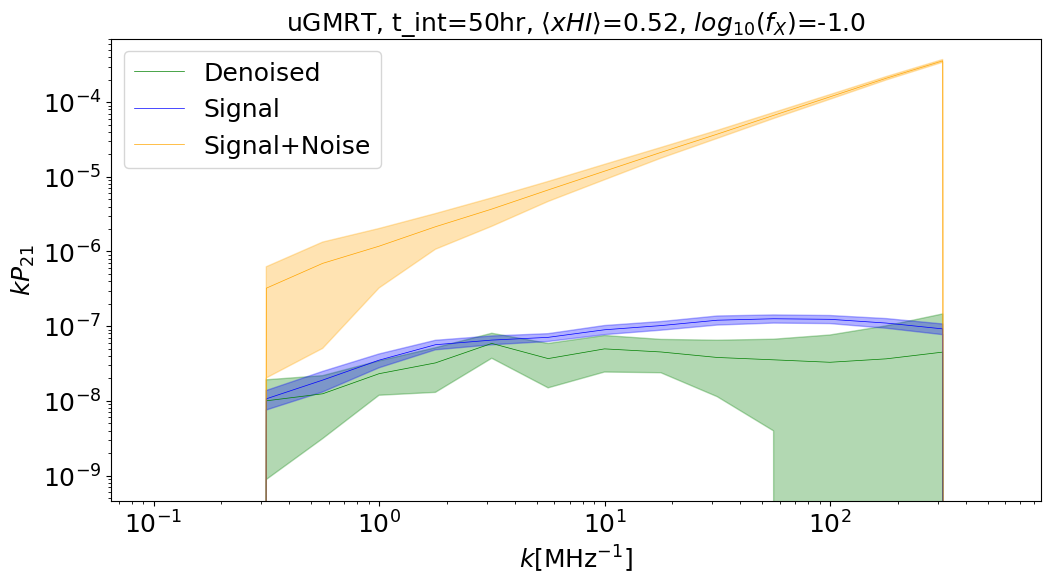

In [32]:
import glob
import numpy as np

g50denoisedfilepath = '../data/denoised_gmrt50h/f21_unet_ps_dum_train_test_uGMRT_t50.0_20250414044023/denoised_ps'

ks = np.loadtxt(f"{g50denoisedfilepath}/ks_bin.csv")
ps1052 = np.loadtxt(f"{g50denoisedfilepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.52_uGMRT_8kHz_t50h_Smin64.2mJy_alphaR-0.44.csv")
ps1052so = np.loadtxt(f"saved_output/train_test_psbs_dump/signalonly/f21_ps_dum_train_test_uGMRT_t500.0_20250331123002/ps/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.52_8kHz.csv")[:,:16]
#ps1052noisy = np.loadtxt(f"saved_output/train_test_psbs_dump/noisy/ps/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.52_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")[:,:16]
#ps1052noisy *= ks[0]*1e6
ps1052noisy = np.loadtxt(f"saved_output/train_test_psbs_dump/noisy_g50/f21_ps_dum_train_test_uGMRT_t50.0_20250410153928/ps/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.52_uGMRT_8kHz_t50h_Smin64.2mJy_alphaR-0.44.csv")[:,:16]


base.initplt()
fig, ax = plt.subplots(nrows=1, ncols=1) 

plt.title(r'uGMRT, t_int=50hr, $\langle xHI\rangle$=0.52, $log_{10}(f_X)$=-1.0')    

ax.set_xscale('log')
ax.set_yscale('log')

for i, (currps, c, label) in enumerate(zip([ps1052, ps1052so, ps1052noisy],['green', 'blue', 'orange'],['Denoised','Signal', 'Signal+Noise'])):
    print(f"shape of ps={currps.shape}")
    ps_mean = np.mean(currps, axis=0)
    currps_std = np.std(currps, axis=0)
    ax.plot(ks[0]*1e6, ps_mean, linewidth=0.5, color=c, label=label)
    ax.fill_between(ks[0] * 1e6, ps_mean - currps_std, ps_mean + currps_std, color=c, alpha=0.3)

plt.xlabel(r"$k$[MHz$^{-1}$]")
plt.ylabel("$kP_{21}$")
#plt.ylim((1e-22, 1e-2))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend()
plt.show()


shape of ps=(20, 16)
shape of ps=(1000, 16)
shape of ps=(1000, 16)


<Figure size 1200x600 with 0 Axes>

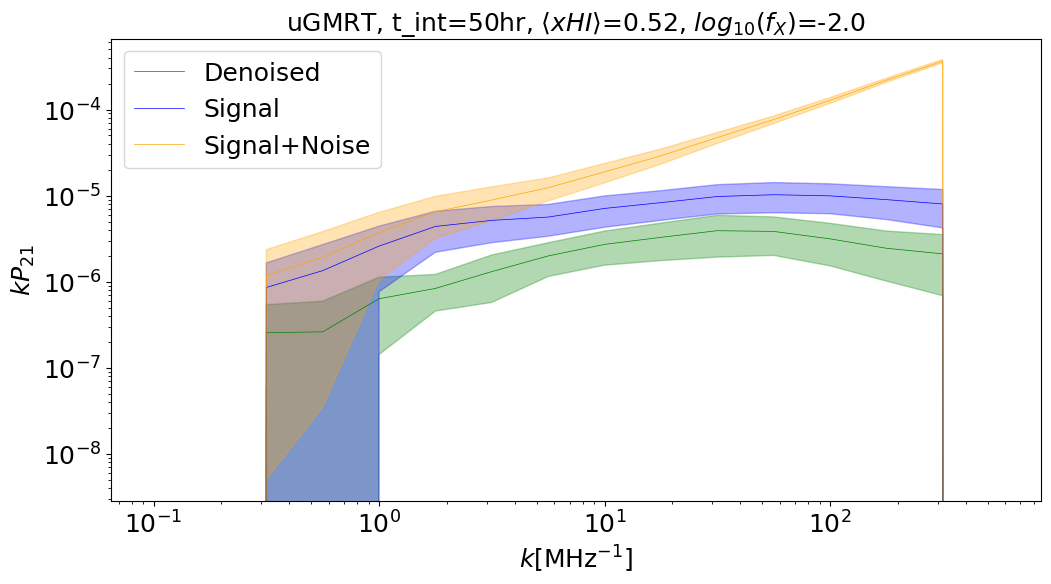

In [31]:
import glob
import numpy as np

g50denoisedfilepath = '../data/denoised_gmrt50h/f21_unet_ps_dum_train_test_uGMRT_t50.0_20250414044023/denoised_ps'

ks = np.loadtxt(f"{g50denoisedfilepath}/ks_bin.csv")
ps1052 = np.loadtxt(f"{g50denoisedfilepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.52_uGMRT_8kHz_t50h_Smin64.2mJy_alphaR-0.44.csv")
ps1052so = np.loadtxt(f"saved_output/train_test_psbs_dump/signalonly/f21_ps_dum_train_test_uGMRT_t500.0_20250331123002/test_ps/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.52_8kHz.csv")[:,:16]
#ps1052noisy = np.loadtxt(f"saved_output/train_test_psbs_dump/noisy/ps/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.52_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")[:,:16]
#ps1052noisy *= ks[0]*1e6
ps1052noisy = np.loadtxt(f"saved_output/train_test_psbs_dump/noisy_g50/f21_ps_dum_train_test_uGMRT_t50.0_20250410153928/test_ps/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.52_uGMRT_8kHz_t50h_Smin64.2mJy_alphaR-0.44.csv")[:,:16]


base.initplt()
fig, ax = plt.subplots(nrows=1, ncols=1) 

plt.title(r'uGMRT, t_int=50hr, $\langle xHI\rangle$=0.52, $log_{10}(f_X)$=-2.0')    

ax.set_xscale('log')
ax.set_yscale('log')

for i, (currps, c, label) in enumerate(zip([ps1052, ps1052so, ps1052noisy],['green', 'blue', 'orange'],['Denoised','Signal', 'Signal+Noise'])):
    print(f"shape of ps={currps.shape}")
    ps_mean = np.mean(currps, axis=0)
    currps_std = np.std(currps, axis=0)
    ax.plot(ks[0]*1e6, ps_mean, linewidth=0.5, color=c, label=label)
    ax.fill_between(ks[0] * 1e6, ps_mean - currps_std, ps_mean + currps_std, color=c, alpha=0.3)

plt.xlabel(r"$k$[MHz$^{-1}$]")
plt.ylabel("$kP_{21}$")
#plt.ylim((1e-22, 1e-2))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend()
plt.show()


shape of ps=(20, 16)
shape of ps=(1000, 16)
shape of ps=(1000, 16)


<Figure size 1200x600 with 0 Axes>

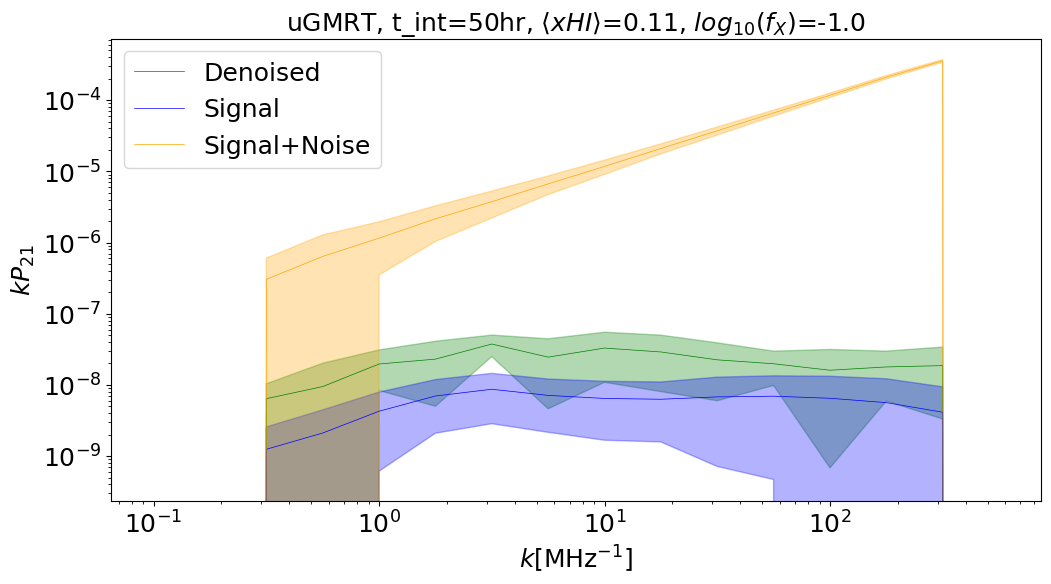

In [30]:
import glob
import numpy as np

g50denoisedfilepath = '../data/denoised_gmrt50h/f21_unet_ps_dum_train_test_uGMRT_t50.0_20250414044023/denoised_ps'

ks = np.loadtxt(f"{g50denoisedfilepath}/ks_bin.csv")
ps1052 = np.loadtxt(f"{g50denoisedfilepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.11_uGMRT_8kHz_t50h_Smin64.2mJy_alphaR-0.44.csv")
ps1052so = np.loadtxt(f"saved_output/train_test_psbs_dump/signalonly/f21_ps_dum_train_test_uGMRT_t500.0_20250331123002/test_ps/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.11_8kHz.csv")[:,:16]
#ps1052noisy = np.loadtxt(f"saved_output/train_test_psbs_dump/noisy/ps/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.52_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.csv")[:,:16]
#ps1052noisy *= ks[0]*1e6
ps1052noisy = np.loadtxt(f"saved_output/train_test_psbs_dump/noisy_g50/f21_ps_dum_train_test_uGMRT_t50.0_20250410153928/test_ps/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.11_uGMRT_8kHz_t50h_Smin64.2mJy_alphaR-0.44.csv")[:,:16]


base.initplt()
fig, ax = plt.subplots(nrows=1, ncols=1) 

plt.title(r'uGMRT, t_int=50hr, $\langle xHI\rangle$=0.11, $log_{10}(f_X)$=-1.0')    
ax.set_xscale('log')
ax.set_yscale('log')

for i, (currps, c, label) in enumerate(zip([ps1052, ps1052so, ps1052noisy],['green', 'blue', 'orange'],['Denoised','Signal', 'Signal+Noise'])):
    print(f"shape of ps={currps.shape}")
    ps_mean = np.mean(currps, axis=0)
    currps_std = np.std(currps, axis=0)
    ax.plot(ks[0]*1e6, ps_mean, linewidth=0.5, color=c, label=label)
    ax.fill_between(ks[0] * 1e6, ps_mean - currps_std, ps_mean + currps_std, color=c, alpha=0.3)

plt.xlabel(r"$k$[MHz$^{-1}$]")
plt.ylabel("$kP_{21}$")
#plt.ylim((1e-22, 1e-2))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend()
plt.show()
